# CSE 676B
### Deep Learning
by `Prof. Alina Vereshchaka`
<br>

## <b>FINAL PROJECT</b>
<br>
<br></br>

<i>TEAM</i>🔻<br>
SOUBHIK SINHA (<b>soubhiks</b>)<br>
AISHWARYA MUTTINENI (<b>amuttine</b>)<br>
EKLAVYA (<b>eklavya</b>)
<br>
<br>

PROJECT TOPIC : <b><i>`BRAIN TUMOUR CLASSIFICATION USING DEEP LEARNING TECHNIQUES BASED ON MRI IMAGES`</i></b>

CHECKPOINT : <b><mark>April 4, 2024</mark></b><br>
FINAL SUBMISSION : <b><mark>May 2, 2024</mark></b>
<br><br>

COMPONENT : <b>`VGGNet (VGG 13)`</b>

In [ ]:
# Mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Let us import the necessary libraries required
# We will later on import more of them - as per requirement

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### STEP 1 : Loading the Dataset

In [ ]:
import os
import zipfile

In [ ]:
# Path to the zip file
zip_file_path = "/content/drive/MyDrive/Datasets/Brain_tumour_Kaggle.zip"

# Directory to extract the contents
extracted_dir = "/content/drive/MyDrive/Datasets/Brain_tumour_Kaggle"

In [ ]:
# Let us first try to extract the images from the zip file

# Creating a directory to extract the contents (Say, if it doesn't exist)
if not os.path.exists(extracted_dir):
    os.makedirs(extracted_dir)

# Extracting the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Defining folder names
folders = ['Testing', 'Training']
subfolders = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Organizing the extracted files into the desired structure
for folder in folders:
    for subfolder in subfolders:
        src = os.path.join(extracted_dir, folder, subfolder)
        dst = os.path.join(extracted_dir, folder, folder + '_' + subfolder)
        os.rename(src, dst)

print("Extraction and organization completed.")

Extraction and organization completed.


In [ ]:
# Defining the directories
train_dir = '/content/drive/MyDrive/Datasets/Brain_tumour_Kaggle/Training'
test_dir = '/content/drive/MyDrive/Datasets/Brain_tumour_Kaggle/Testing'

In [ ]:
# Now that we have extracted the data (images) - let us now load them to the notebook

import tensorflow as tf

# Defining image size and batch size
img_size = (224, 224)
batch_size = 32

# Creating train and test datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

# Printing class names (training)
class_names_train = train_ds.class_names
print("Class Names (Train):", class_names_train)

# Printing class names (testing)
class_names_test = test_ds.class_names
print("Class Names (Test):", class_names_test)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.
Class Names (Train): ['Training_glioma', 'Training_meningioma', 'Training_notumor', 'Training_pituitary']
Class Names (Test): ['Testing_glioma', 'Testing_meningioma', 'Testing_notumor', 'Testing_pituitary']


In [ ]:
# Let us see the number of images under each of the categories

# Function to count the number of files in each subdirectory
def count_files(directory):
    counts = {}
    for subdir in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, subdir)):
            counts[subdir] = len(os.listdir(os.path.join(directory, subdir)))
    return counts

# Counting files in training and testing directories
train_counts = count_files(train_dir)
test_counts = count_files(test_dir)

# Printing the counts
print("Training Dataset:")
for class_name, count in train_counts.items():
    print(f"{class_name}: {count} images")

print("\nTesting Dataset:")
for class_name, count in test_counts.items():
    print(f"{class_name}: {count} images")

Training Dataset:
Training_glioma: 1321 images
Training_meningioma: 1339 images
Training_notumor: 1595 images
Training_pituitary: 1457 images

Testing Dataset:
Testing_glioma: 300 images
Testing_meningioma: 306 images
Testing_notumor: 405 images
Testing_pituitary: 300 images


In [ ]:
# As we can see, the number of images are "imbalanced" - which may lead to class imbalance, eventually leading to
# Bad performance by the model(s).

# One solution is to generate fake images w.r.t each category - but the analysis may become biased and unfruitful.
# ONE SAFE OPTION IS - removing the images - to match the shape each category holds

'''
REMOVING IMAGES - will not affect the analysis as we still be carrying along a huge number of images
to work with.
'''

def limit_images(directory, target_count):
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            images = os.listdir(subdir_path)
            images.sort()  # Sort to ensure consistency in which images are removed
            if len(images) > target_count:
                excess_count = len(images) - target_count
                excess_images = images[-excess_count:]
                for img in excess_images:
                    os.remove(os.path.join(subdir_path, img))

# Defining the target counts for training and testing datasets
target_train_count = 1321
target_test_count = 300

# Limiting the number of images in training and testing datasets
limit_images('/content/drive/MyDrive/Datasets/Brain_tumour_Kaggle/Training', target_train_count)
limit_images('/content/drive/MyDrive/Datasets/Brain_tumour_Kaggle/Testing', target_test_count)

print("Image counts adjusted successfully.")

Image counts adjusted successfully.


In [ ]:
# Let us again check the number of images

# Counting files in training and testing directories
train_counts = count_files(train_dir)
test_counts = count_files(test_dir)

# Printing the counts
print("Training Dataset:")
for class_name, count in train_counts.items():
    print(f"{class_name}: {count} images")

print("\nTesting Dataset:")
for class_name, count in test_counts.items():
    print(f"{class_name}: {count} images")

Training Dataset:
Training_glioma: 1321 images
Training_meningioma: 1321 images
Training_notumor: 1321 images
Training_pituitary: 1321 images

Testing Dataset:
Testing_glioma: 300 images
Testing_meningioma: 300 images
Testing_notumor: 300 images
Testing_pituitary: 300 images


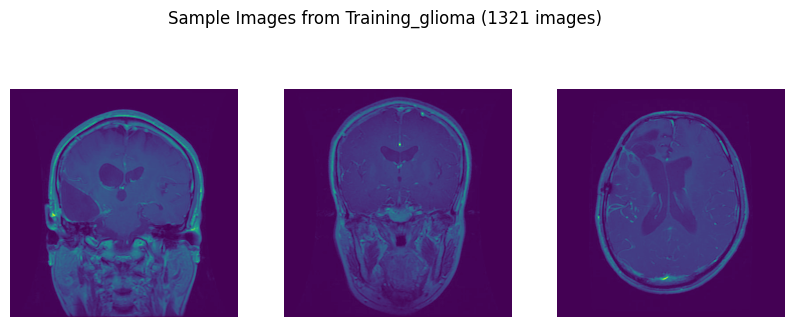

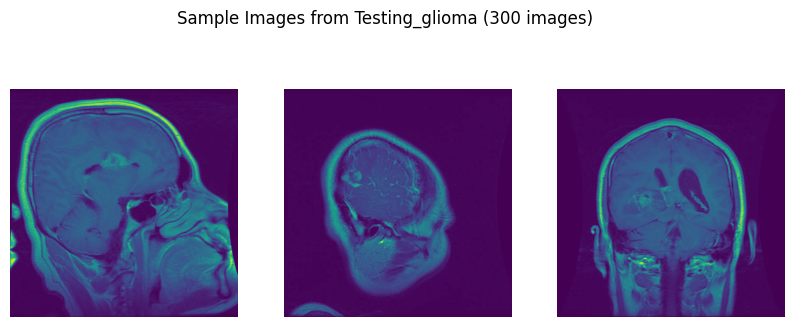

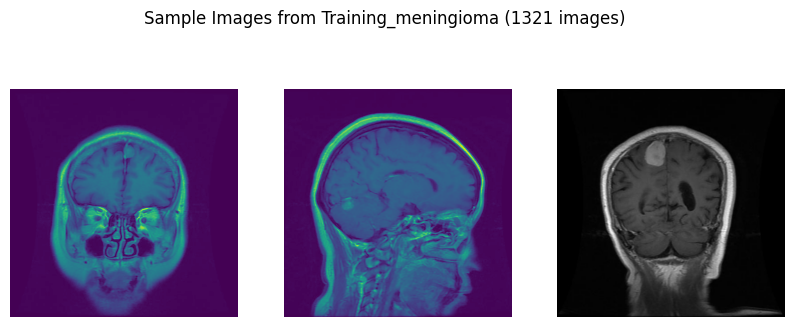

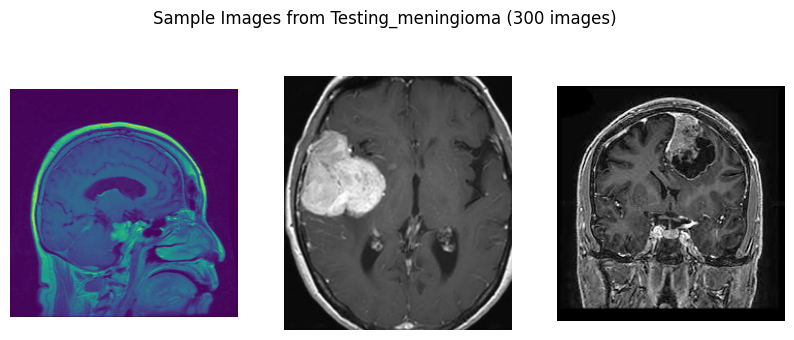

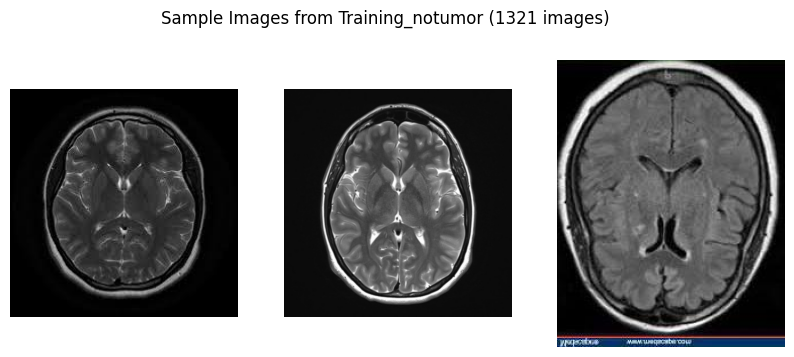

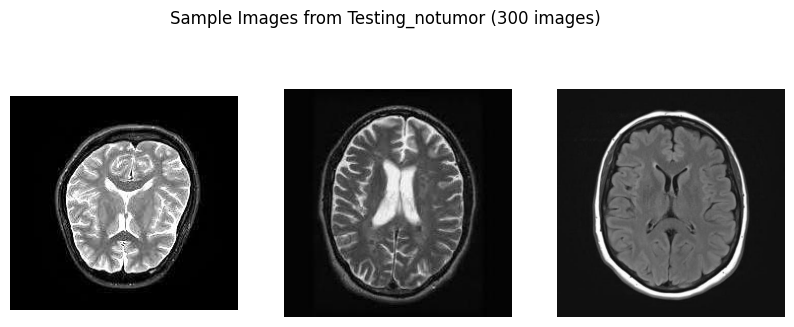

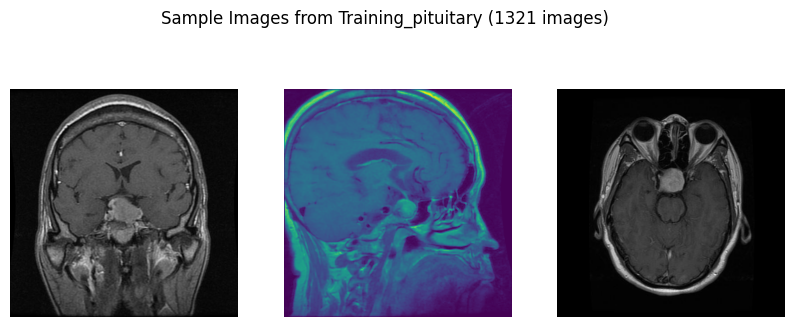

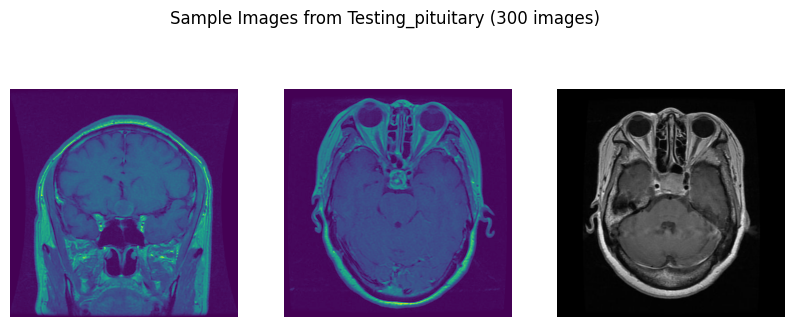

In [ ]:
# Let us have a look into the images from each of the directories (at random)

import random
import matplotlib.image as mpimg

# Function to display sample images
def display_samples(directory, label):
    label_dir = os.path.join(directory, label)
    images = os.listdir(label_dir)
    sample_images = random.sample(images, min(3, len(images)))  # Displaying up to 3 random images
    plt.figure(figsize=(10, 4))
    plt.suptitle(f'Sample Images from {label} ({len(images)} images)')
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(label_dir, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Displaying sample images from training and testing directories for each label
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
for label in labels:
    display_samples(train_dir, 'Training_' + label)
    display_samples(test_dir, 'Testing_' + label)

### STEP 2 : Data Exploration

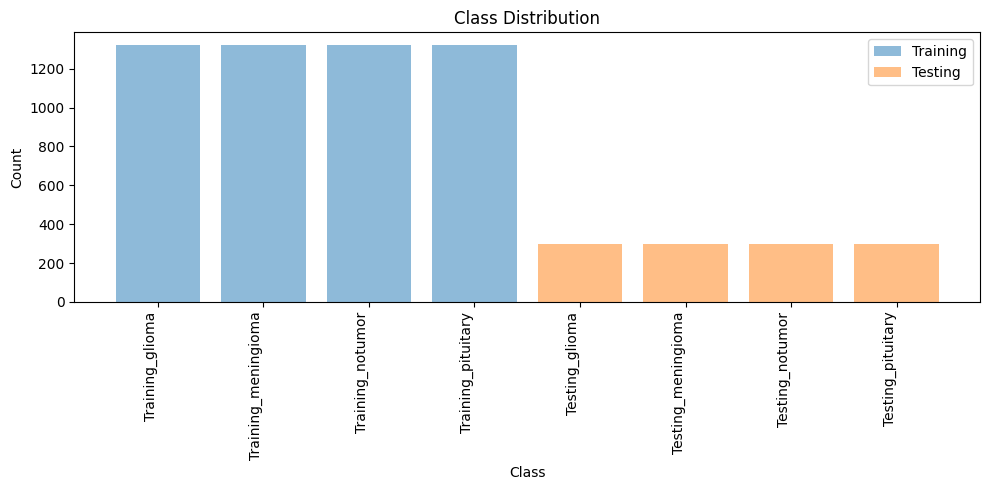

In [ ]:
'''
PLOT CLASS DISTRIBUTION
'''

base_dir = "/content/drive/MyDrive/Datasets/Brain_tumour_Kaggle"

# Function to plot class distribution
def plot_class_distribution(base_dir):
    plt.figure(figsize=(10, 5))
    for subset in ["Training", "Testing"]:
        class_counts = {}
        for class_name in os.listdir(os.path.join(base_dir, subset)):
            class_counts[class_name] = len(os.listdir(os.path.join(base_dir, subset, class_name)))
        plt.bar(class_counts.keys(), class_counts.values(), alpha=0.5, label=subset)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.title("Class Distribution")
    plt.xticks(rotation=90, ha='right')  # Rotating x-labels and align them to the right
    plt.tight_layout()  # Adjusting layout for better spacing
    plt.legend()
    plt.show()

# Plotting class distribution
plot_class_distribution(base_dir)

In [ ]:
!pip install opencv-python

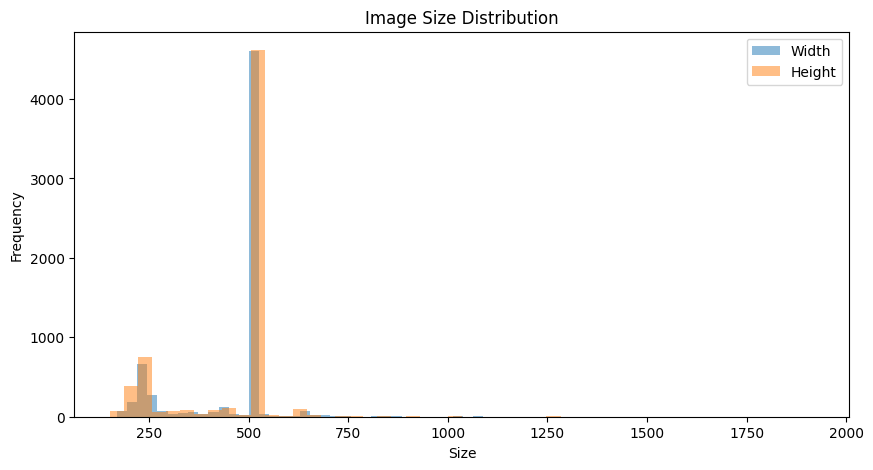

In [ ]:
'''
IMAGE SIZE ANALYSIS
'''

import cv2

# Function to calculate image sizes
def calculate_image_sizes(base_dir):
    image_sizes = []
    for subset in ["Training", "Testing"]:
        for class_name in os.listdir(os.path.join(base_dir, subset)):
            class_dir = os.path.join(base_dir, subset, class_name)
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                img = cv2.imread(img_path)
                image_sizes.append(img.shape[:2])
    return np.array(image_sizes)

# Calculating image sizes
image_sizes = calculate_image_sizes(base_dir)

# Plotting image size distribution
plt.figure(figsize=(10, 5))
plt.hist(image_sizes[:, 0], bins=50, alpha=0.5, label='Width')
plt.hist(image_sizes[:, 1], bins=50, alpha=0.5, label='Height')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Image Size Distribution')
plt.legend()
plt.show()

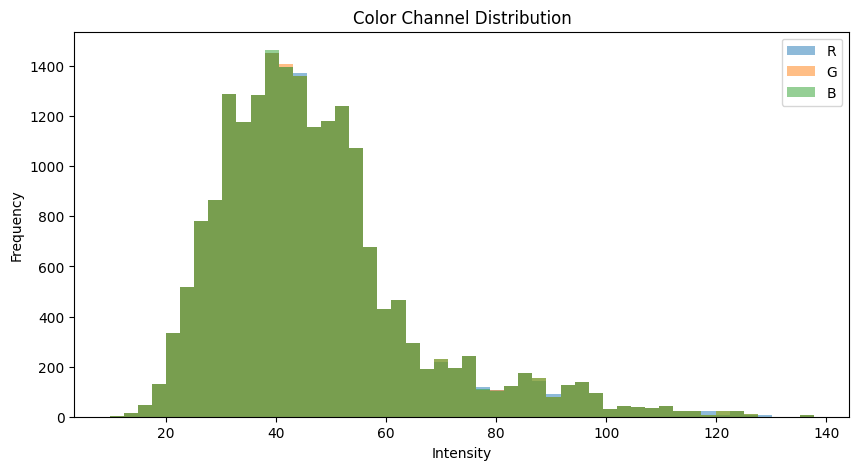

In [ ]:
'''
COLOR CHANNEL ANALYSIS
'''

# Function to calculate color channel distribution
def calculate_color_channels(base_dir):
    color_channels = {'R': [], 'G': [], 'B': []}
    for subset in ["Training", "Testing"]:
        for class_name in os.listdir(os.path.join(base_dir, subset)):
            class_dir = os.path.join(base_dir, subset, class_name)
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                img = cv2.imread(img_path)
                for channel in range(3):  # 0: R, 1: G, 2: B
                    color_channels['R'].append(np.mean(img[:, :, 0]))
                    color_channels['G'].append(np.mean(img[:, :, 1]))
                    color_channels['B'].append(np.mean(img[:, :, 2]))
    return color_channels

# Calculating color channel distribution
color_channels = calculate_color_channels(base_dir)

# Plotting color channel distribution
plt.figure(figsize=(10, 5))
for channel, values in color_channels.items():
    plt.hist(values, bins=50, alpha=0.5, label=channel)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Color Channel Distribution')
plt.legend()
plt.show()

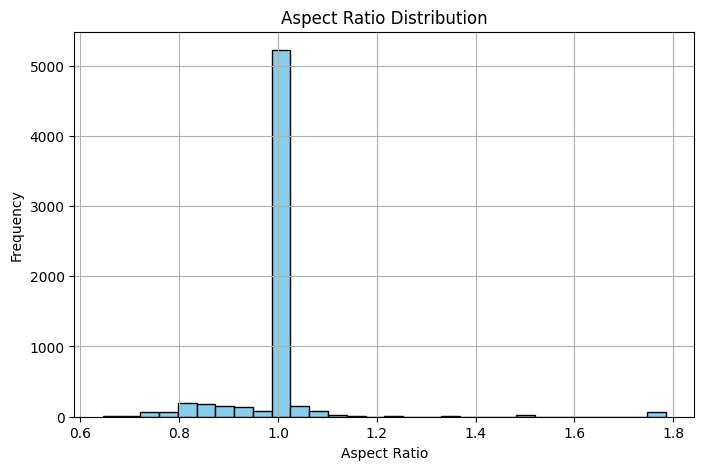

In [ ]:
'''
ASPECT RATIO ANALYSIS
'''

# Function to calculate aspect ratios of images
def calculate_aspect_ratios(base_dir):
    aspect_ratios = []
    for folder in ['Training', 'Testing']:
        folder_dir = os.path.join(base_dir, folder)
        for subfolder in os.listdir(folder_dir):
            subfolder_dir = os.path.join(folder_dir, subfolder)
            for img_name in os.listdir(subfolder_dir):
                img_path = os.path.join(subfolder_dir, img_name)
                img = cv2.imread(img_path)
                aspect_ratio = img.shape[1] / img.shape[0]  # width / height
                aspect_ratios.append(aspect_ratio)
    return aspect_ratios

# Calculating aspect ratios
aspect_ratios = calculate_aspect_ratios(base_dir)

# Plotting aspect ratio distribution
plt.figure(figsize=(8, 5))
plt.hist(aspect_ratios, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.title('Aspect Ratio Distribution')
plt.grid(True)
plt.show()

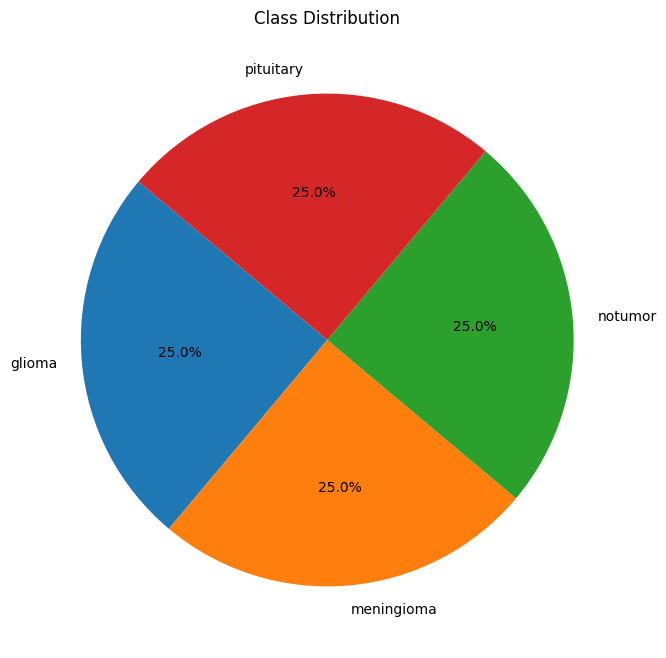

In [ ]:
'''
CLASS DISTRIBUTION ANALYSIS - USING PIE CHART
'''

# Function to calculate class distribution
def calculate_class_distribution(base_dir):
    class_counts = {}
    for folder in ['Training', 'Testing']:
        folder_dir = os.path.join(base_dir, folder)
        for subfolder in os.listdir(folder_dir):
            class_name = subfolder.split('_')[-1]  # Extract class name
            if class_name in class_counts:
                class_counts[class_name] += len(os.listdir(os.path.join(folder_dir, subfolder)))
            else:
                class_counts[class_name] = len(os.listdir(os.path.join(folder_dir, subfolder)))
    return class_counts

# Calculating class distribution
class_counts = calculate_class_distribution(base_dir)

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()

### STEP 3 : Data Pre-processing

In [ ]:
# Now here is the - thing, we have now planned to go with
# Black-n-White / Gray-scale images - for the efficiency of models

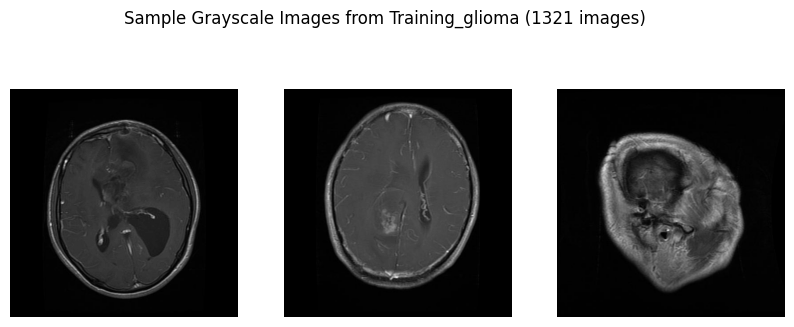

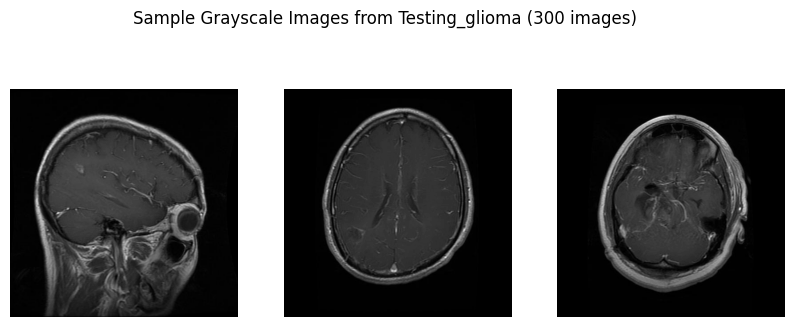

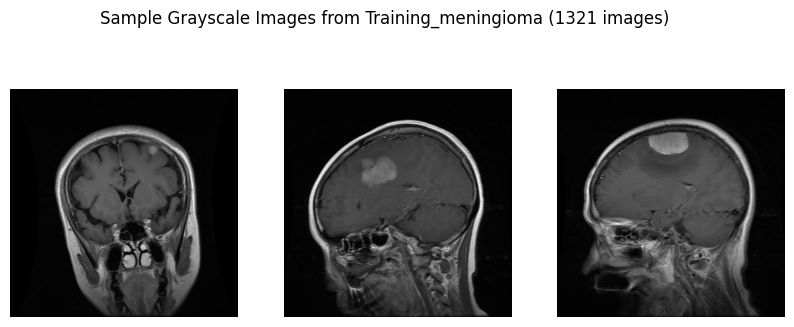

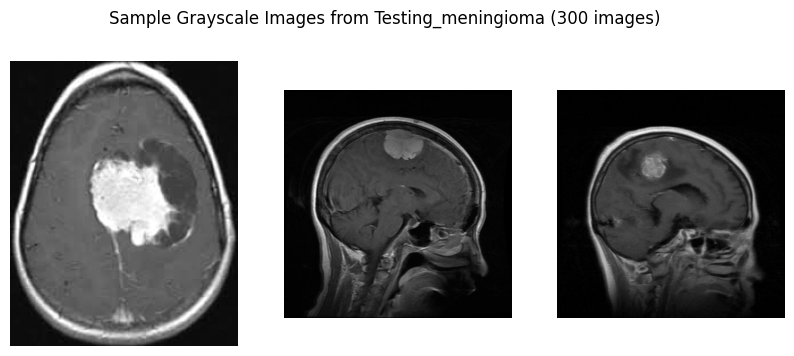

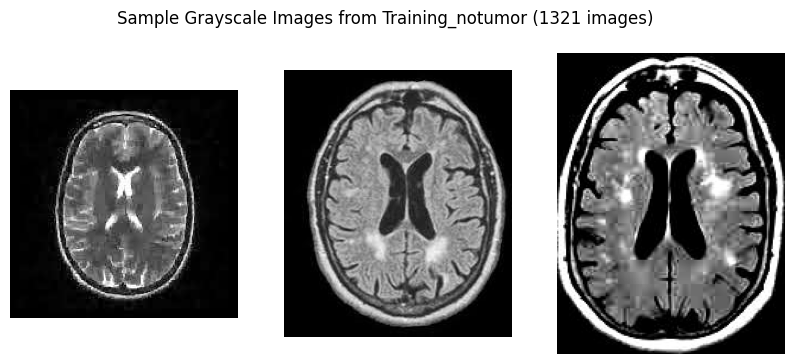

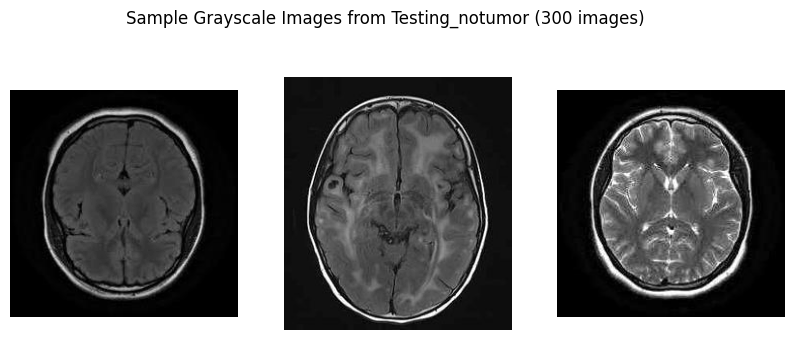

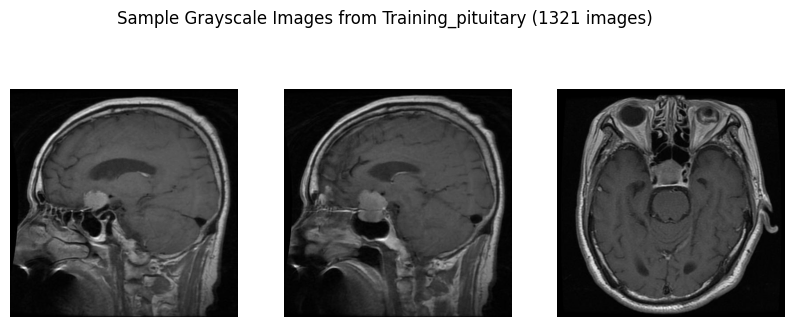

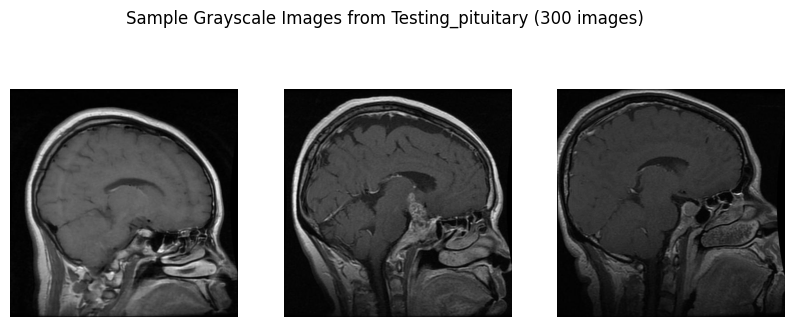

In [ ]:
import cv2

# Function to convert and display sample images in grayscale using cv2
def display_samples_grayscale(directory, label):
    label_dir = os.path.join(directory, label)
    images = os.listdir(label_dir)
    sample_images = random.sample(images, min(3, len(images)))  # Displaying up to 3 random images
    plt.figure(figsize=(10, 4))
    plt.suptitle(f'Sample Grayscale Images from {label} ({len(images)} images)')
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(label_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Converting to grayscale
        plt.subplot(1, 3, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.show()

# Displaying sample grayscale images from training and testing directories for each label
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
for label in labels:
    display_samples_grayscale(train_dir, 'Training_' + label)
    display_samples_grayscale(test_dir, 'Testing_' + label)

In [ ]:
# Let's apply more data preprocessing techniques to our dataset

from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to resize images
def resize_images(directory, label, target_size=(224, 224)):
    label_dir = os.path.join(directory, label)
    for img_name in os.listdir(label_dir):
        img_path = os.path.join(label_dir, img_name)
        img = cv2.imread(img_path)
        img_resized = cv2.resize(img, target_size)
        cv2.imwrite(img_path, img_resized)

labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
for label in labels:
    resize_images(train_dir, f'Training_{label}')
    resize_images(test_dir, f'Testing_{label}')

In [ ]:
# Function to normalize images
def normalize_images(directory):
    for img_name in os.listdir(directory):
        img_path = os.path.join(directory, img_name)
        img = cv2.imread(img_path).astype(np.float32)
        img /= 255.0
        cv2.imwrite(img_path, img)

labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
for label in labels:
    train_label_dir = os.path.join(train_dir, f'Training_{label}')
    test_label_dir = os.path.join(test_dir, f'Testing_{label}')
    normalize_images(train_label_dir)
    normalize_images(test_label_dir)

In [ ]:
# Function to apply histogram equalization to both training and testing samples

def apply_histogram_equalization(base_dir):
    for subset in ["Training", "Testing"]:
        subset_dir = os.path.join(base_dir, subset)
        for label in os.listdir(subset_dir):
            label_dir = os.path.join(subset_dir, label)
            for img_name in os.listdir(label_dir):
                img_path = os.path.join(label_dir, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_eq = cv2.equalizeHist(img)
                cv2.imwrite(img_path, img_eq)

# Applying histogram equalization to both training and testing samples
apply_histogram_equalization(base_dir)

### STEP 4 : Main Statistics of the Dataset

In [ ]:
# Function to calculate main statistics of the dataset

import cv2

def calculate_dataset_statistics(directory):
    pixel_values = []
    for subdir in os.listdir(directory):
        label_dir = os.path.join(directory, subdir)
        for img_name in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_name)
            img = cv2.imread(img_path)
            # Flattenning the image to calculate statistics across all pixels
            pixel_values.extend(img.flatten())

    # Converting the list of pixel values to a numpy array for easy calculations
    pixel_values = np.array(pixel_values)

    # Calculating statistics
    mean = np.mean(pixel_values)
    std_dev = np.std(pixel_values)
    min_val = np.min(pixel_values)
    max_val = np.max(pixel_values)
    p25 = np.percentile(pixel_values, 25)
    p50 = np.percentile(pixel_values, 50)
    p75 = np.percentile(pixel_values, 75)

    # Displaying statistics
    print("Dataset Statistics:")
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Minimum Value: {min_val}")
    print(f"Maximum Value: {max_val}")
    print(f"25th Percentile: {p25}")
    print(f"50th Percentile (Median): {p50}")
    print(f"75th Percentile: {p75}")

# Calculating and display statistics for the training dataset
print("Main Statistics - TRAINING DATA :")
calculate_dataset_statistics(train_dir)
print("\n")
# Calculating and display statistics for the testing dataset
print("Main Statistics - TESTING DATA :")
calculate_dataset_statistics(test_dir)

Main Statistics - TRAINING DATA :
Dataset Statistics:
Mean: 18.474079031362972
Standard Deviation: 65.77916189224645
Minimum Value: 0
Maximum Value: 255
25th Percentile: 0.0
50th Percentile (Median): 0.0
75th Percentile: 0.0


Main Statistics - TESTING DATA :
Dataset Statistics:
Mean: 20.849377391581633
Standard Deviation: 69.56680488948538
Minimum Value: 0
Maximum Value: 255
25th Percentile: 0.0
50th Percentile (Median): 0.0
75th Percentile: 0.0


### STEP 5 : Model Implementation and Data Loaders Creation

In [ ]:
'''
For this project, we have chosen the below models / architetcures of CNN :
1. VGGNet
2. ResNet
3. DenseNet
4. GoogLeNet
'''

'\nFor this project, we have chosen the below models / architetcures of CNN :\n1. VGGNet\n2. ResNet\n3. DenseNet\n4. GoogLeNet\n'

In [ ]:
# Now, it's pretty debatble to choose which
# architecture of VGGNet - VGG11 (A), VGG11 (A-LRN), VGG13 (B),
# VGG16 (C), VGG16(D) or VGG19(E)

'''
Our motive of this project is to classify accurately
the type of tumour detected in the MRI image of the brain
'''

# For that reason - we must go with either VGG16 or VGG19
# But which one to choose ?

'''
Among VGG16 (C), VGG16 (D), and VGG19 (E), VGG19 (E) is generally
considered superior for accurate image classification. This is because
VGG19 has more layers compared to both variations of VGG16, enabling it
to capture more intricate features in the input images. However, this
comes with increased computational demands and model complexity.

VGG16 (D) typically denotes a variant of VGG16 that integrates batch
normalization layers, which can expedite training and potentially enhance
generalization performance. Nonetheless, it may not consistently surpass
the original VGG16 architecture (VGG16 (C)) or VGG19 (E) in terms of
accuracy, as the inclusion of batch normalization does not guarantee
superior performance in all scenarios.
'''

# Hence we have decided to go with the implementation of VGG19 (E)

'\nAmong VGG16 (C), VGG16 (D), and VGG19 (E), VGG19 (E) is generally\nconsidered superior for accurate image classification. This is because\nVGG19 has more layers compared to both variations of VGG16, enabling it\nto capture more intricate features in the input images. However, this\ncomes with increased computational demands and model complexity.\n\nVGG16 (D) typically denotes a variant of VGG16 that integrates batch\nnormalization layers, which can expedite training and potentially enhance\ngeneralization performance. Nonetheless, it may not consistently surpass\nthe original VGG16 architecture (VGG16 (C)) or VGG19 (E) in terms of\naccuracy, as the inclusion of batch normalization does not guarantee\nsuperior performance in all scenarios.\n'

In [ ]:
'''
BUT WE HAVE ANOTHER MAJOR PROBLEM !

Since Google Colab has some limtations on GPU,
rather than going with a complex arhcitecture - we shall
go with a simple architecture of VGGNet.

For the time being - let it be VGG13 (Architecture : https://arxiv.org/abs/1409.1556)
'''

'\nBUT WE HAVE ANOTHER MAJOR PROBLEM !\n\nSince Google Colab has some limtations on GPU,\nrather than going with a complex arhcitecture - we shall\ngo with a simple architecture of VGGNet.\n\nFor the time being - let it be VGG13\n'

In [ ]:
# Let us first create validation dataset and counting the number
# of images

import shutil
import random

def create_validation_data(source_folder, destination_folder, num_images_per_class):
    # Creating the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Iterating through each sub-directory in the source folder
    for sub_folder in os.listdir(source_folder):
        source_sub_folder_path = os.path.join(source_folder, sub_folder)
        destination_sub_folder_path = os.path.join(destination_folder, f"Validation_{sub_folder}")

        # Creating the sub-directory in the destination folder
        if not os.path.exists(destination_sub_folder_path):
            os.makedirs(destination_sub_folder_path)

        # Listing all images in the source sub-folder
        images = os.listdir(source_sub_folder_path)

        # Randomly selecting and moving images
        random.shuffle(images)
        for i in range(num_images_per_class):
            image = images[i]
            source_image_path = os.path.join(source_sub_folder_path, image)
            destination_image_path = os.path.join(destination_sub_folder_path, image)
            shutil.move(source_image_path, destination_image_path)

# Defining paths to our dataset folders
main_folder = "/content/drive/MyDrive/Datasets/Brain_tumour_Kaggle"
training_folder = os.path.join(main_folder, "Training")
testing_folder = os.path.join(main_folder, "Testing")
validation_folder = os.path.join(main_folder, "Validation")

# Number of images to move from training to validation
num_validation_images_per_class = 300

# Creating the validation dataset
create_validation_data(training_folder, validation_folder, num_validation_images_per_class)

# Function to count files in each directory
def count_files(directory):
    counts = {}
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        counts[class_name] = len(os.listdir(class_dir))
    return counts

# Counting files in training, testing, and validation directories
train_counts = count_files(training_folder)
test_counts = count_files(testing_folder)
valid_counts = count_files(validation_folder)

# Printing the counts
print("Training Dataset:")
for class_name, count in train_counts.items():
    print(f"{class_name}: {count} images")

print("\nValidation Dataset:")
for class_name, count in valid_counts.items():
    print(f"{class_name}: {count} images")

print("\nTesting Dataset:")
for class_name, count in test_counts.items():
    print(f"{class_name}: {count} images")

Training Dataset:
Training_glioma: 1021 images
Training_meningioma: 1021 images
Training_notumor: 1021 images
Training_pituitary: 1021 images

Validation Dataset:
Validation_Training_glioma: 300 images
Validation_Training_meningioma: 300 images
Validation_Training_notumor: 300 images
Validation_Training_pituitary: 300 images

Testing Dataset:
Testing_glioma: 300 images
Testing_meningioma: 300 images
Testing_notumor: 300 images
Testing_pituitary: 300 images


In [ ]:
# Let us create the dataloaders

# Loading necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [ ]:
# Setting device to GPU if available, otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
print(device)

cuda:0


In [ ]:
# Defining transforms for data preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
# Loading the datasets
train_dataset = torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/Datasets/Brain_tumour_Kaggle/Training", transform=transform)
valid_dataset = torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/Datasets/Brain_tumour_Kaggle/Validation", transform=transform)
test_dataset = torchvision.datasets.ImageFolder(root="/content/drive/MyDrive/Datasets/Brain_tumour_Kaggle/Testing", transform=transform)

In [ ]:
# Defining data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Creating the VGG13 model using PyTorch (from scratch)
'''
We have modified the architecture of VGG13 by adding Batch Normalization
after every convolutional layer
'''

class VGG13_with_BatchNorm(nn.Module):
    def __init__(self, num_classes=4):
        super(VGG13_with_BatchNorm, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.BatchNorm1d(4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.BatchNorm1d(4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [ ]:
# Creating an instance of VGG13 model
vgg13_model_base = VGG13_with_BatchNorm(num_classes=4).to(device)

<br>

### STEP 6 : Model Training and Validation

In [ ]:
# Defining loss function and optimizer
criterion_base = nn.CrossEntropyLoss()
optimizer_base = optim.SGD(vgg13_model_base.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    return correct / total

# Training loop
num_epochs = 10
train_losses_base = []
train_accuracies_base = []
valid_losses_base = []
valid_accuracies_base = []

for epoch in range(num_epochs):
    # Training
    vgg13_model_base.train()
    running_loss = 0.0
    total_train_accuracy = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_base.zero_grad()
        outputs = vgg13_model_base(inputs)
        loss = criterion_base(outputs, labels)
        loss.backward()
        optimizer_base.step()
        running_loss += loss.item()
        total_train_accuracy += calculate_accuracy(outputs, labels)

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_accuracy = total_train_accuracy / len(train_loader)
    train_losses_base.append(epoch_train_loss)
    train_accuracies_base.append(epoch_train_accuracy)

    # Validation
    vgg13_model_base.eval()
    running_loss = 0.0
    total_valid_accuracy = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = vgg13_model_base(inputs)
            loss = criterion_base(outputs, labels)
            running_loss += loss.item()
            total_valid_accuracy += calculate_accuracy(outputs, labels)

    epoch_valid_loss = running_loss / len(valid_loader)
    epoch_valid_accuracy = total_valid_accuracy / len(valid_loader)
    valid_losses_base.append(epoch_valid_loss)
    valid_accuracies_base.append(epoch_valid_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_accuracy:.4f}, Valid Loss: {epoch_valid_loss:.4f}, Valid Acc: {epoch_valid_accuracy:.4f}")

Epoch [1/10], Train Loss: 0.7494, Train Acc: 0.6959, Valid Loss: 0.5855, Valid Acc: 0.7525
Epoch [2/10], Train Loss: 0.4887, Train Acc: 0.8087, Valid Loss: 0.4048, Valid Acc: 0.8561
Epoch [3/10], Train Loss: 0.3840, Train Acc: 0.8551, Valid Loss: 0.4416, Valid Acc: 0.8446
Epoch [4/10], Train Loss: 0.3429, Train Acc: 0.8722, Valid Loss: 0.3781, Valid Acc: 0.8692
Epoch [5/10], Train Loss: 0.2810, Train Acc: 0.9011, Valid Loss: 0.3377, Valid Acc: 0.8840
Epoch [6/10], Train Loss: 0.2218, Train Acc: 0.9183, Valid Loss: 0.4565, Valid Acc: 0.8561
Epoch [7/10], Train Loss: 0.1676, Train Acc: 0.9375, Valid Loss: 0.3521, Valid Acc: 0.8906
Epoch [8/10], Train Loss: 0.1504, Train Acc: 0.9460, Valid Loss: 0.4328, Valid Acc: 0.8734
Epoch [9/10], Train Loss: 0.1176, Train Acc: 0.9588, Valid Loss: 0.3034, Valid Acc: 0.9104
Epoch [10/10], Train Loss: 0.0798, Train Acc: 0.9736, Valid Loss: 0.3853, Valid Acc: 0.8939


<br>

### STEP 7 : Model Testing

In [ ]:
# Testing the model

test_loss_base = 0.0
test_accuracy_base = 0.0
total_test_samples = 0
testing_predictions_base = []
true_labels_base = []

vgg13_model_base.eval()

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vgg13_model_base(inputs)
        loss = criterion_base(outputs, labels)
        test_loss_base += loss.item()

        # Collecting predicted labels
        _, predicted = torch.max(outputs, 1)
        testing_predictions_base.extend(predicted.cpu().numpy())
        true_labels_base.extend(labels.cpu().numpy())

        test_accuracy_base += calculate_accuracy(outputs, labels)
        total_test_samples += labels.size(0)

test_loss_base /= len(test_loader)
test_accuracy_base /= len(test_loader)

print(f"Test Loss: {test_loss_base:.4f}, Test Accuracy: {test_accuracy_base:.4f}")

Test Loss: 0.3703, Test Accuracy: 0.8964


<br>

### STEP 8 : CREATING VARIOUS SETUPS

In [ ]:
# Now let us create different setups to check
# which setup works the best, giving the best accuracy

'''
SETUP 1 : Adding Regularization (L2)
'''

vgg13_model_1 = VGG13_with_BatchNorm(num_classes=4).to(device)
criterion_1 = nn.CrossEntropyLoss()
optimizer_1 = optim.SGD(vgg13_model_1.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)

In [ ]:
# Training loop
num_epochs = 10
train_losses_1 = []
train_accuracies_1 = []
valid_losses_1 = []
valid_accuracies_1 = []

for epoch in range(num_epochs):
    # Training
    vgg13_model_1.train()
    running_loss = 0.0
    total_train_accuracy = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_1.zero_grad()
        outputs = vgg13_model_1(inputs)
        loss = criterion_1(outputs, labels)
        loss.backward()
        optimizer_1.step()
        running_loss += loss.item()
        total_train_accuracy += calculate_accuracy(outputs, labels)

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_accuracy = total_train_accuracy / len(train_loader)
    train_losses_1.append(epoch_train_loss)
    train_accuracies_1.append(epoch_train_accuracy)

    # Validation
    vgg13_model_1.eval()
    running_loss = 0.0
    total_valid_accuracy = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = vgg13_model_1(inputs)
            loss = criterion_1(outputs, labels)
            running_loss += loss.item()
            total_valid_accuracy += calculate_accuracy(outputs, labels)

    epoch_valid_loss = running_loss / len(valid_loader)
    epoch_valid_accuracy = total_valid_accuracy / len(valid_loader)
    valid_losses_1.append(epoch_valid_loss)
    valid_accuracies_1.append(epoch_valid_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_accuracy:.4f}, Valid Loss: {epoch_valid_loss:.4f}, Valid Acc: {epoch_valid_accuracy:.4f}")

Epoch [1/10], Train Loss: 0.7281, Train Acc: 0.7088, Valid Loss: 0.5343, Valid Acc: 0.8092
Epoch [2/10], Train Loss: 0.4863, Train Acc: 0.8140, Valid Loss: 0.4642, Valid Acc: 0.8174
Epoch [3/10], Train Loss: 0.3891, Train Acc: 0.8521, Valid Loss: 0.3560, Valid Acc: 0.8725
Epoch [4/10], Train Loss: 0.3314, Train Acc: 0.8811, Valid Loss: 0.3216, Valid Acc: 0.8808
Epoch [5/10], Train Loss: 0.3096, Train Acc: 0.8863, Valid Loss: 0.3541, Valid Acc: 0.8750
Epoch [6/10], Train Loss: 0.2217, Train Acc: 0.9161, Valid Loss: 0.3467, Valid Acc: 0.8857
Epoch [7/10], Train Loss: 0.1838, Train Acc: 0.9404, Valid Loss: 0.4289, Valid Acc: 0.8602
Epoch [8/10], Train Loss: 0.1499, Train Acc: 0.9443, Valid Loss: 0.4731, Valid Acc: 0.8668
Epoch [9/10], Train Loss: 0.1287, Train Acc: 0.9566, Valid Loss: 0.3604, Valid Acc: 0.8947
Epoch [10/10], Train Loss: 0.0929, Train Acc: 0.9684, Valid Loss: 0.3360, Valid Acc: 0.9038


In [ ]:
# Testing the model

test_loss_1 = 0.0
test_accuracy_1 = 0.0
total_test_samples = 0
testing_predictions_1 = []
true_labels_1 = []

vgg13_model_1.eval()

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vgg13_model_1(inputs)
        loss = criterion_1(outputs, labels)
        test_loss_1 += loss.item()

        # Collecting predicted labels
        _, predicted = torch.max(outputs, 1)
        testing_predictions_1.extend(predicted.cpu().numpy())
        true_labels_1.extend(labels.cpu().numpy())

        test_accuracy_1 += calculate_accuracy(outputs, labels)
        total_test_samples += labels.size(0)

test_loss_1 /= len(test_loader)
test_accuracy_1 /= len(test_loader)

print(f"Test Loss: {test_loss_1:.4f}, Test Accuracy: {test_accuracy_1:.4f}")

Test Loss: 0.3428, Test Accuracy: 0.8898


In [ ]:
'''
SETUP 2 : Regularization (L2) + Increased number of Epochs (20)
'''

vgg13_model_2 = VGG13_with_BatchNorm(num_classes=4).to(device)
criterion_2 = nn.CrossEntropyLoss()
optimizer_2 = optim.SGD(vgg13_model_2.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)

In [ ]:
# Training loop
num_epochs = 20
train_losses_2 = []
train_accuracies_2 = []
valid_losses_2 = []
valid_accuracies_2 = []

for epoch in range(num_epochs):
    # Training
    vgg13_model_2.train()
    running_loss = 0.0
    total_train_accuracy = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_2.zero_grad()
        outputs = vgg13_model_2(inputs)
        loss = criterion_2(outputs, labels)
        loss.backward()
        optimizer_2.step()
        running_loss += loss.item()
        total_train_accuracy += calculate_accuracy(outputs, labels)

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_accuracy = total_train_accuracy / len(train_loader)
    train_losses_2.append(epoch_train_loss)
    train_accuracies_2.append(epoch_train_accuracy)

    # Validation
    vgg13_model_2.eval()
    running_loss = 0.0
    total_valid_accuracy = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = vgg13_model_2(inputs)
            loss = criterion_2(outputs, labels)
            running_loss += loss.item()
            total_valid_accuracy += calculate_accuracy(outputs, labels)

    epoch_valid_loss = running_loss / len(valid_loader)
    epoch_valid_accuracy = total_valid_accuracy / len(valid_loader)
    valid_losses_2.append(epoch_valid_loss)
    valid_accuracies_2.append(epoch_valid_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_accuracy:.4f}, Valid Loss: {epoch_valid_loss:.4f}, Valid Acc: {epoch_valid_accuracy:.4f}")

Epoch [1/20], Train Loss: 0.7314, Train Acc: 0.7045, Valid Loss: 0.4797, Valid Acc: 0.8199
Epoch [2/20], Train Loss: 0.4873, Train Acc: 0.8182, Valid Loss: 0.4257, Valid Acc: 0.8339
Epoch [3/20], Train Loss: 0.4019, Train Acc: 0.8479, Valid Loss: 0.4142, Valid Acc: 0.8421
Epoch [4/20], Train Loss: 0.3331, Train Acc: 0.8796, Valid Loss: 0.3848, Valid Acc: 0.8660
Epoch [5/20], Train Loss: 0.2707, Train Acc: 0.8968, Valid Loss: 0.3545, Valid Acc: 0.8758
Epoch [6/20], Train Loss: 0.2332, Train Acc: 0.9116, Valid Loss: 0.3911, Valid Acc: 0.8766
Epoch [7/20], Train Loss: 0.1736, Train Acc: 0.9404, Valid Loss: 0.2963, Valid Acc: 0.9013
Epoch [8/20], Train Loss: 0.1501, Train Acc: 0.9444, Valid Loss: 0.4641, Valid Acc: 0.8635
Epoch [9/20], Train Loss: 0.1190, Train Acc: 0.9549, Valid Loss: 0.3158, Valid Acc: 0.9021
Epoch [10/20], Train Loss: 0.0876, Train Acc: 0.9688, Valid Loss: 0.3108, Valid Acc: 0.9071
Epoch [11/20], Train Loss: 0.0683, Train Acc: 0.9751, Valid Loss: 0.3491, Valid Acc: 0.90

In [ ]:
# Testing the model

test_loss_2 = 0.0
test_accuracy_2 = 0.0
total_test_samples = 0
testing_predictions_2 = []
true_labels_2 = []

vgg13_model_2.eval()

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vgg13_model_2(inputs)
        loss = criterion_2(outputs, labels)
        test_loss_2 += loss.item()

        # Collecting predicted labels
        _, predicted = torch.max(outputs, 1)
        testing_predictions_2.extend(predicted.cpu().numpy())
        true_labels_2.extend(labels.cpu().numpy())

        test_accuracy_2 += calculate_accuracy(outputs, labels)
        total_test_samples += labels.size(0)

test_loss_2 /= len(test_loader)
test_accuracy_2 /= len(test_loader)

print(f"Test Loss: {test_loss_2:.4f}, Test Accuracy: {test_accuracy_2:.4f}")

Test Loss: 0.3303, Test Accuracy: 0.9095


In [ ]:
'''
SETUP 3 : Regularization (L2) + Increased number of Epochs (20) + Different Learning rate (0.01)
'''

vgg13_model_3 = VGG13_with_BatchNorm(num_classes=4).to(device)
criterion_3 = nn.CrossEntropyLoss()
optimizer_3 = optim.SGD(vgg13_model_3.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)

In [ ]:
# Training loop
num_epochs = 20
train_losses_3 = []
train_accuracies_3 = []
valid_losses_3 = []
valid_accuracies_3 = []

for epoch in range(num_epochs):
    # Training
    vgg13_model_3.train()
    running_loss = 0.0
    total_train_accuracy = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_3.zero_grad()
        outputs = vgg13_model_3(inputs)
        loss = criterion_3(outputs, labels)
        loss.backward()
        optimizer_3.step()
        running_loss += loss.item()
        total_train_accuracy += calculate_accuracy(outputs, labels)

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_accuracy = total_train_accuracy / len(train_loader)
    train_losses_3.append(epoch_train_loss)
    train_accuracies_3.append(epoch_train_accuracy)

    # Validation
    vgg13_model_3.eval()
    running_loss = 0.0
    total_valid_accuracy = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = vgg13_model_3(inputs)
            loss = criterion_3(outputs, labels)
            running_loss += loss.item()
            total_valid_accuracy += calculate_accuracy(outputs, labels)

    epoch_valid_loss = running_loss / len(valid_loader)
    epoch_valid_accuracy = total_valid_accuracy / len(valid_loader)
    valid_losses_3.append(epoch_valid_loss)
    valid_accuracies_3.append(epoch_valid_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_accuracy:.4f}, Valid Loss: {epoch_valid_loss:.4f}, Valid Acc: {epoch_valid_accuracy:.4f}")

Epoch [1/20], Train Loss: 1.7135, Train Acc: 0.6236, Valid Loss: 1.0381, Valid Acc: 0.7467
Epoch [2/20], Train Loss: 2.5152, Train Acc: 0.6569, Valid Loss: 3.2762, Valid Acc: 0.6456
Epoch [3/20], Train Loss: 2.9754, Train Acc: 0.6828, Valid Loss: 1.8083, Valid Acc: 0.7401
Epoch [4/20], Train Loss: 2.7557, Train Acc: 0.7322, Valid Loss: 3.3714, Valid Acc: 0.7566
Epoch [5/20], Train Loss: 2.1772, Train Acc: 0.7564, Valid Loss: 2.2628, Valid Acc: 0.7541
Epoch [6/20], Train Loss: 1.9243, Train Acc: 0.7859, Valid Loss: 2.0288, Valid Acc: 0.7854
Epoch [7/20], Train Loss: 1.4872, Train Acc: 0.8148, Valid Loss: 1.5865, Valid Acc: 0.8454
Epoch [8/20], Train Loss: 1.2020, Train Acc: 0.8386, Valid Loss: 1.1831, Valid Acc: 0.8199
Epoch [9/20], Train Loss: 1.2166, Train Acc: 0.8424, Valid Loss: 1.9270, Valid Acc: 0.8487
Epoch [10/20], Train Loss: 0.9825, Train Acc: 0.8587, Valid Loss: 1.1059, Valid Acc: 0.8331
Epoch [11/20], Train Loss: 0.8747, Train Acc: 0.8710, Valid Loss: 1.2628, Valid Acc: 0.86

In [ ]:
# Testing the model

test_loss_3 = 0.0
test_accuracy_3 = 0.0
total_test_samples = 0
testing_predictions_3 = []
true_labels_3 = []

vgg13_model_3.eval()

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vgg13_model_3(inputs)
        loss = criterion_3(outputs, labels)
        test_loss_3 += loss.item()

        # Collecting predicted labels
        _, predicted = torch.max(outputs, 1)
        testing_predictions_3.extend(predicted.cpu().numpy())
        true_labels_3.extend(labels.cpu().numpy())

        test_accuracy_3 += calculate_accuracy(outputs, labels)
        total_test_samples += labels.size(0)

test_loss_3 /= len(test_loader)
test_accuracy_3 /= len(test_loader)

print(f"Test Loss: {test_loss_3:.4f}, Test Accuracy: {test_accuracy_3:.4f}")

Test Loss: 1.0460, Test Accuracy: 0.8799


<br>

### STEP 9 : Model Comparison and Model Saving

In [ ]:
'''
We can clearly see that the model (SETUP-2)
gives the best testing accuracy

Thus, we will try to save it as a pickle (.pkl) file
'''

# Saving the best model (SETUP-2)
torch.save(vgg13_model_2.state_dict(), '/content/drive/MyDrive/Colab Notebooks/MS - CSE 676 B - Deep Learning/vgg13_model_2_BEST_VGG_MODEL.pkl')

<br>

### STEP 10 : Results and Graphs

In [ ]:
'''
Reporting training accuracy, training loss, validation accuracy, validation loss,
testing accuracy, and testing loss.
'''

# BASE MODEL 🔻
print("BASE MODEL 🔻")
print("Training Accuracies : ", train_accuracies_base)
print("Training Losses : ", train_losses_base)
print("Validation Accuracies : ", valid_accuracies_base)
print("Validation Losses : ", valid_losses_base)
print("Testing Accuracy : ", test_accuracy_base)
print("Testing Loss : ", test_loss_base)

print("\n")

# SETUP-1 MODEL 🔻
print("SETUP-1 MODEL 🔻")
print("Training Accuracies : ", train_accuracies_1)
print("Training Losses : ", train_losses_1)
print("Validation Accuracies : ", valid_accuracies_1)
print("Validation Losses : ", valid_losses_1)
print("Testing Accuracy : ", test_accuracy_1)
print("Testing Loss : ", test_loss_1)

print("\n")

# SETUP-2 MODEL 🔻
print("SETUP-2 MODEL 🔻")
print("Training Accuracies : ", train_accuracies_2)
print("Training Losses : ", train_losses_2)
print("Validation Accuracies : ", valid_accuracies_2)
print("Validation Losses : ", valid_losses_2)
print("Testing Accuracy : ", test_accuracy_2)
print("Testing Loss : ", test_loss_2)

print("\n")

# SETUP-3 MODEL 🔻
print("SETUP-3 MODEL 🔻")
print("Training Accuracies : ", train_accuracies_3)
print("Training Losses : ", train_losses_3)
print("Validation Accuracies : ", valid_accuracies_3)
print("Validation Losses : ", valid_losses_3)
print("Testing Accuracy : ", test_accuracy_3)
print("Testing Loss : ", test_loss_3)

BASE MODEL 🔻
Training Accuracies :  [0.6958984375, 0.80869140625, 0.855078125, 0.872216796875, 0.90107421875, 0.91826171875, 0.937451171875, 0.94599609375, 0.958837890625, 0.9736328125]
Training Losses :  [0.7494072117842734, 0.48874473746400326, 0.38396981765981764, 0.3428982550976798, 0.28099141374696046, 0.2218372244387865, 0.16757964954013005, 0.1503520000987919, 0.11764944195965654, 0.07982961236666597]
Validation Accuracies :  [0.7524671052631579, 0.8560855263157895, 0.8445723684210527, 0.8692434210526315, 0.884046052631579, 0.8560855263157895, 0.890625, 0.8733552631578947, 0.9103618421052632, 0.8939144736842105]
Validation Losses :  [0.5854757866381031, 0.40475818240328837, 0.44162506868719664, 0.3780666109125473, 0.3376621572717436, 0.45654596346062853, 0.352097681870586, 0.43283006661620577, 0.30343462948037897, 0.3852745785184915]
Testing Accuracy :  0.8963815789473685
Testing Loss :  0.37034812221597685


SETUP-1 MODEL 🔻
Training Accuracies :  [0.7087890625, 0.81396484375, 0

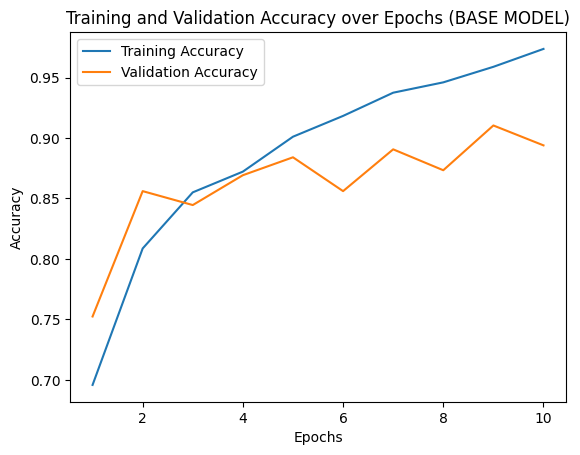

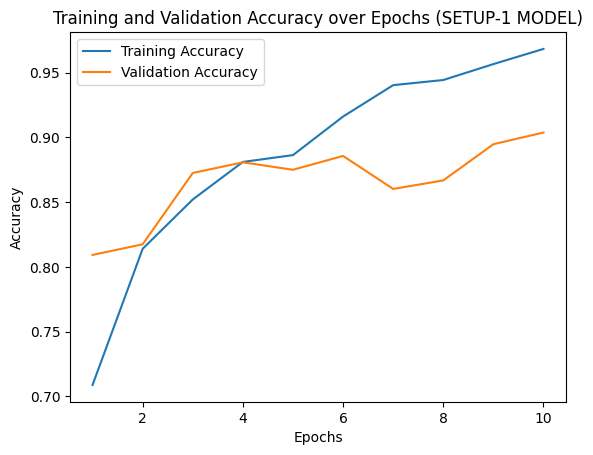

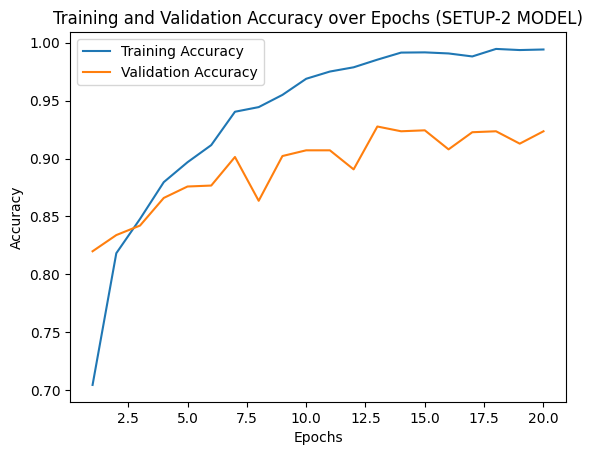

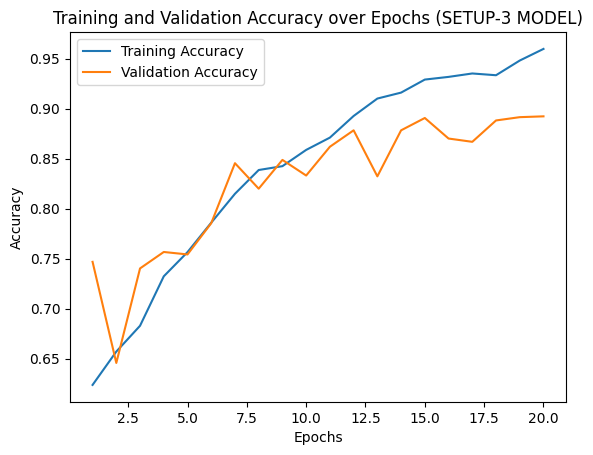

In [ ]:
'''
Plotting the training and validation accuracy over time (epochs).
'''

# BASE MODEL 🔻

# Plotting training and validation accuracy
plt.plot(range(1, 10 + 1), train_accuracies_base, label='Training Accuracy')
plt.plot(range(1, 10 + 1), valid_accuracies_base, label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs (BASE MODEL)')

# Adding legend
plt.legend()

# Showing plot
plt.show()

print("\n")

# SETUP-1 MODEL 🔻

# Plotting training and validation accuracy
plt.plot(range(1, 10 + 1), train_accuracies_1, label='Training Accuracy')
plt.plot(range(1, 10 + 1), valid_accuracies_1, label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs (SETUP-1 MODEL)')

# Adding legend
plt.legend()

# Showing plot
plt.show()

print("\n")

# SETUP-2 MODEL 🔻

# Plotting training and validation accuracy
plt.plot(range(1, 20 + 1), train_accuracies_2, label='Training Accuracy')
plt.plot(range(1, 20 + 1), valid_accuracies_2, label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs (SETUP-2 MODEL)')

# Adding legend
plt.legend()

# Showing plot
plt.show()

print("\n")

# SETUP-3 MODEL 🔻

# Plotting training and validation accuracy
plt.plot(range(1, 20 + 1), train_accuracies_3, label='Training Accuracy')
plt.plot(range(1, 20 + 1), valid_accuracies_3, label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs (SETUP-3 MODEL)')

# Adding legend
plt.legend()

# Showing plot
plt.show()

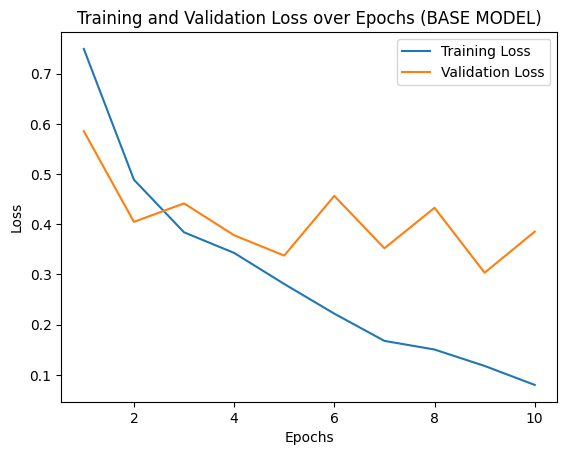

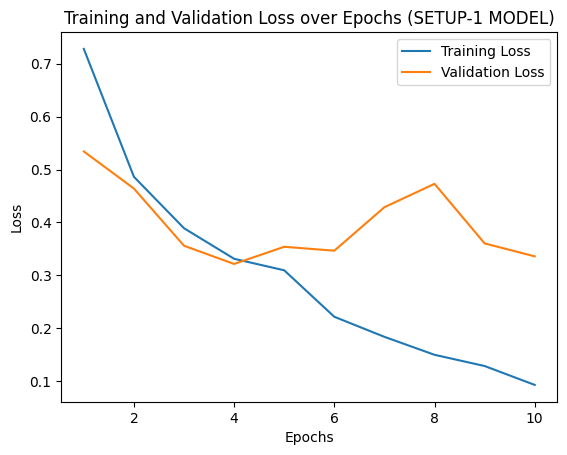

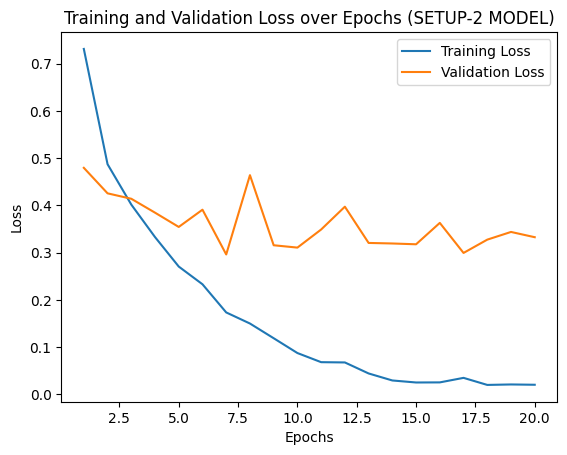

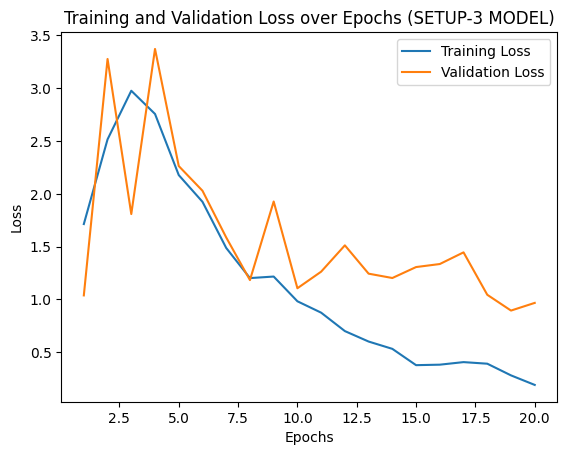

In [ ]:
'''
Plotting the training and validation loss over time (epochs).
'''

# BASE MODEL 🔻

# Plot training and validation loss
plt.plot(range(1, 10 + 1), train_losses_base, label='Training Loss')
plt.plot(range(1, 10 + 1), valid_losses_base, label='Validation Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs (BASE MODEL)')

# Adding legend
plt.legend()

# Showing plot
plt.show()

print("\n")

# SETUP-1 MODEL 🔻

# Plot training and validation loss
plt.plot(range(1, 10 + 1), train_losses_1, label='Training Loss')
plt.plot(range(1, 10 + 1), valid_losses_1, label='Validation Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs (SETUP-1 MODEL)')

# Adding legend
plt.legend()

# Showing plot
plt.show()

print("\n")

# SETUP-2 MODEL 🔻

# Plot training and validation loss
plt.plot(range(1, 20 + 1), train_losses_2, label='Training Loss')
plt.plot(range(1, 20 + 1), valid_losses_2, label='Validation Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs (SETUP-2 MODEL)')

# Adding legend
plt.legend()

# Showing plot
plt.show()

print("\n")

# SETUP-3 MODEL 🔻

# Plot training and validation loss
plt.plot(range(1, 20 + 1), train_losses_3, label='Training Loss')
plt.plot(range(1, 20 + 1), valid_losses_3, label='Validation Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs (SETUP-3 MODEL)')

# Adding legend
plt.legend()

# Showing plot
plt.show()

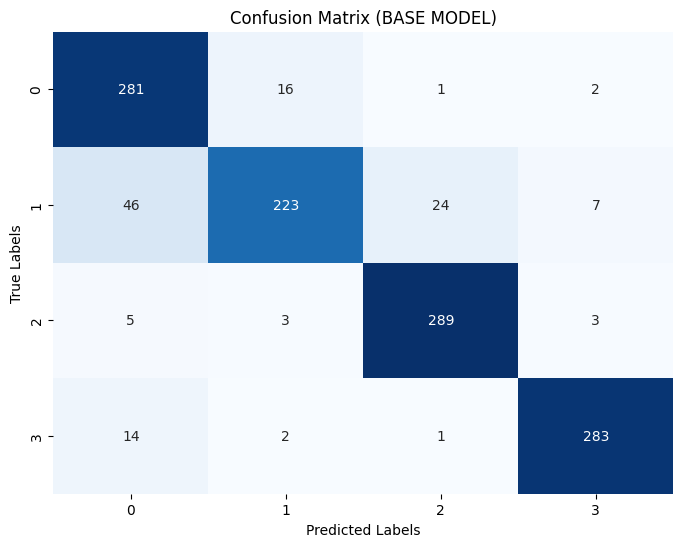

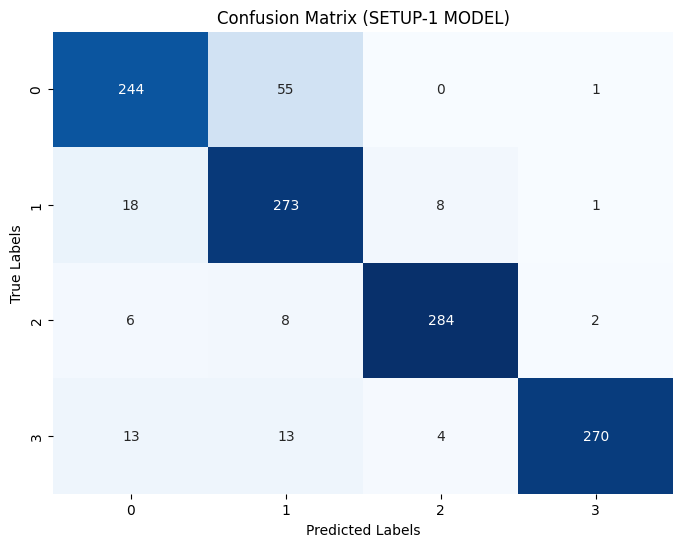

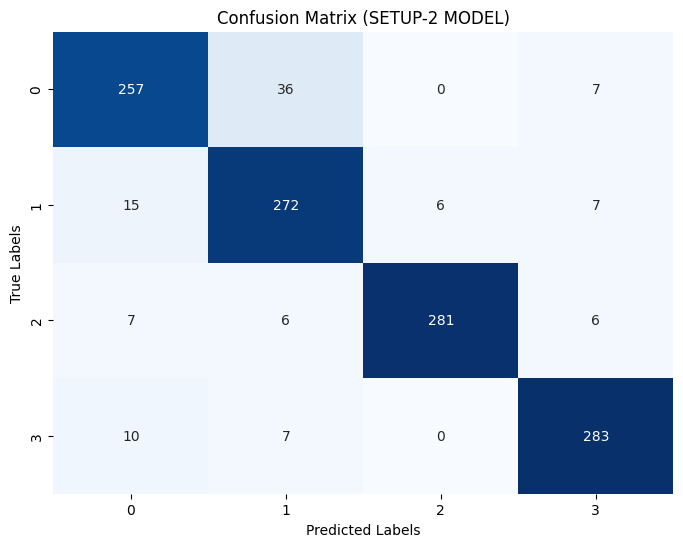

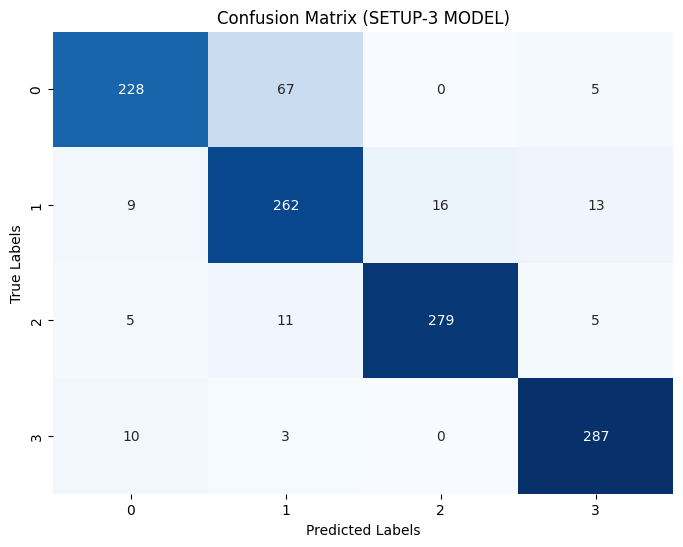

In [ ]:
'''
Generating a confusion matrix using the model's predictions on the test set.
'''

from sklearn.metrics import confusion_matrix

# BASE MODEL 🔻

# Converting lists to numpy arrays
testing_predictions_base = np.array(testing_predictions_base)
true_labels_base = np.array(true_labels_base)

# Generating confusion matrix
conf_matrix = confusion_matrix(true_labels_base, testing_predictions_base)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (BASE MODEL)')
plt.show()

print("\n")

# SETUP-1 MODEL 🔻

# Converting lists to numpy arrays
testing_predictions_1 = np.array(testing_predictions_1)
true_labels_1 = np.array(true_labels_1)

# Generating confusion matrix
conf_matrix = confusion_matrix(true_labels_1, testing_predictions_1)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (SETUP-1 MODEL)')
plt.show()

print("\n")

# SETUP-2 MODEL 🔻

# Converting lists to numpy arrays
testing_predictions_2 = np.array(testing_predictions_2)
true_labels_2 = np.array(true_labels_2)

# Generating confusion matrix
conf_matrix = confusion_matrix(true_labels_2, testing_predictions_2)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (SETUP-2 MODEL)')
plt.show()

print("\n")

# SETUP-3 MODEL 🔻

# Converting lists to numpy arrays
testing_predictions_3 = np.array(testing_predictions_3)
true_labels_3 = np.array(true_labels_3)

# Generating confusion matrix
conf_matrix = confusion_matrix(true_labels_3, testing_predictions_3)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (SETUP-3 MODEL)')
plt.show()

In [ ]:
'''
Calculating and report other evaluation metrics such as Precision, recall and F1
score.
'''

from sklearn.metrics import precision_recall_fscore_support

# BASE MODEL 🔻

print("BASE MODEL 🔻")
# Calculating precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels_base, testing_predictions_base, average='weighted')

# Report the metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1_score:.4f}')

print("\n")

print("SETUP-1 MODEL 🔻")
# Calculating precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels_1, testing_predictions_1, average='weighted')

# Report the metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1_score:.4f}')

print("\n")

print("SETUP-2 MODEL 🔻")
# Calculating precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels_2, testing_predictions_2, average='weighted')

# Report the metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1_score:.4f}')

print("\n")

print("SETUP-3 MODEL 🔻")
# Calculating precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels_3, testing_predictions_3, average='weighted')

# Report the metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1_score:.4f}')

BASE MODEL 🔻
Precision: 0.9007
Recall: 0.8967
F1-score: 0.8952


SETUP-1 MODEL 🔻
Precision: 0.8989
Recall: 0.8925
F1-score: 0.8938


SETUP-2 MODEL 🔻
Precision: 0.9124
Recall: 0.9108
F1-score: 0.9112


SETUP-3 MODEL 🔻
Precision: 0.8850
Recall: 0.8800
F1-score: 0.8800
